<code>plot_VRILE_counts.ipynb</code> plots VRILE count for all S2S models and desired observations as a function of month (based on forecast valid date for models)

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from S2S_sea_ice_plotting import VRILE_count_plot

Load VRILE counts for model and obs

In [2]:
seas_str = 'ALL'
vrile_thresh_str = '05'
nday_change = 5

In [3]:
fpath_load = '/home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/COMMON_LAND_MASK/data/'
fname_load = fpath_load+'S2S_model_VRILE_counts_{nday_change}day_change_VRILE{vrile_str}_VRILE_seas_{seas_str}.csv'.format(nday_change=nday_change,
                                                                                                  vrile_str=vrile_thresh_str,
                                                                                                  seas_str=seas_str)
model_count_load = pd.read_csv(fname_load)
fname_load_obs = fpath_load+'obs_VRILE_counts_{nday_change}day_change_VRILE{vrile_str}_VRILE_seas_{seas_str}.csv'.format(nday_change=nday_change,
                                                                                                  vrile_str=vrile_thresh_str,
                                                                                                  seas_str=seas_str)
obs_count_load = pd.read_csv(fname_load_obs)

Choose what to plot, actual count or percent of VRILE days.  For the model data, keep only the lead weeks we are interested in.  

In [4]:
TO_PLOT = 'SIE anom pct'
TO_PLOT_str = 'SIE_anom_pct'
if (TO_PLOT == 'SIE anom pct') | (TO_PLOT == 'SIE anom'):
    title_str = 'Anomalous SIE' 
elif (TO_PLOT =='SIE pct') | (TO_PLOT == 'SIE'):
    title_str = 'SIE'
lead_week_sel = [2,3,4]
lead_week_min = np.amin(lead_week_sel)
lead_week_max = np.amax(lead_week_sel)
model_VRILE_counts_lead_sel = model_count_load[model_count_load['lead time (weeks)'].isin(lead_week_sel)]

Add model and obs to a single dataframe

In [5]:
combo = model_VRILE_counts_lead_sel.append(obs_count_load)
combo['model name'] = combo['model name'].replace({'NSIDC_0079':'NASA Bootstrap','NSIDC_0051':'NASA Team'})
combo['valid month'] = combo['valid date']

Replace and sort regions and model names for plotting purposes

In [6]:
combo = combo.replace({'ecmwf':'ECMWF','metreofr':'METEOFR','ukmo':'UKMO','ncep':'NCEP'})
combo = combo.replace({'East Siberian-Beaufort-Chukchi Sea':'E. Sib./Beauf./Chuk. Sea',
                      'East Greenland Sea':'E. Greenland Sea'})
model_name_sort = ["ECMWF","METEOFR","NCEP","UKMO","NASA Bootstrap","NASA Team"]
combo['model name sort'] = pd.Categorical(combo['model name'],model_name_sort)

Plot

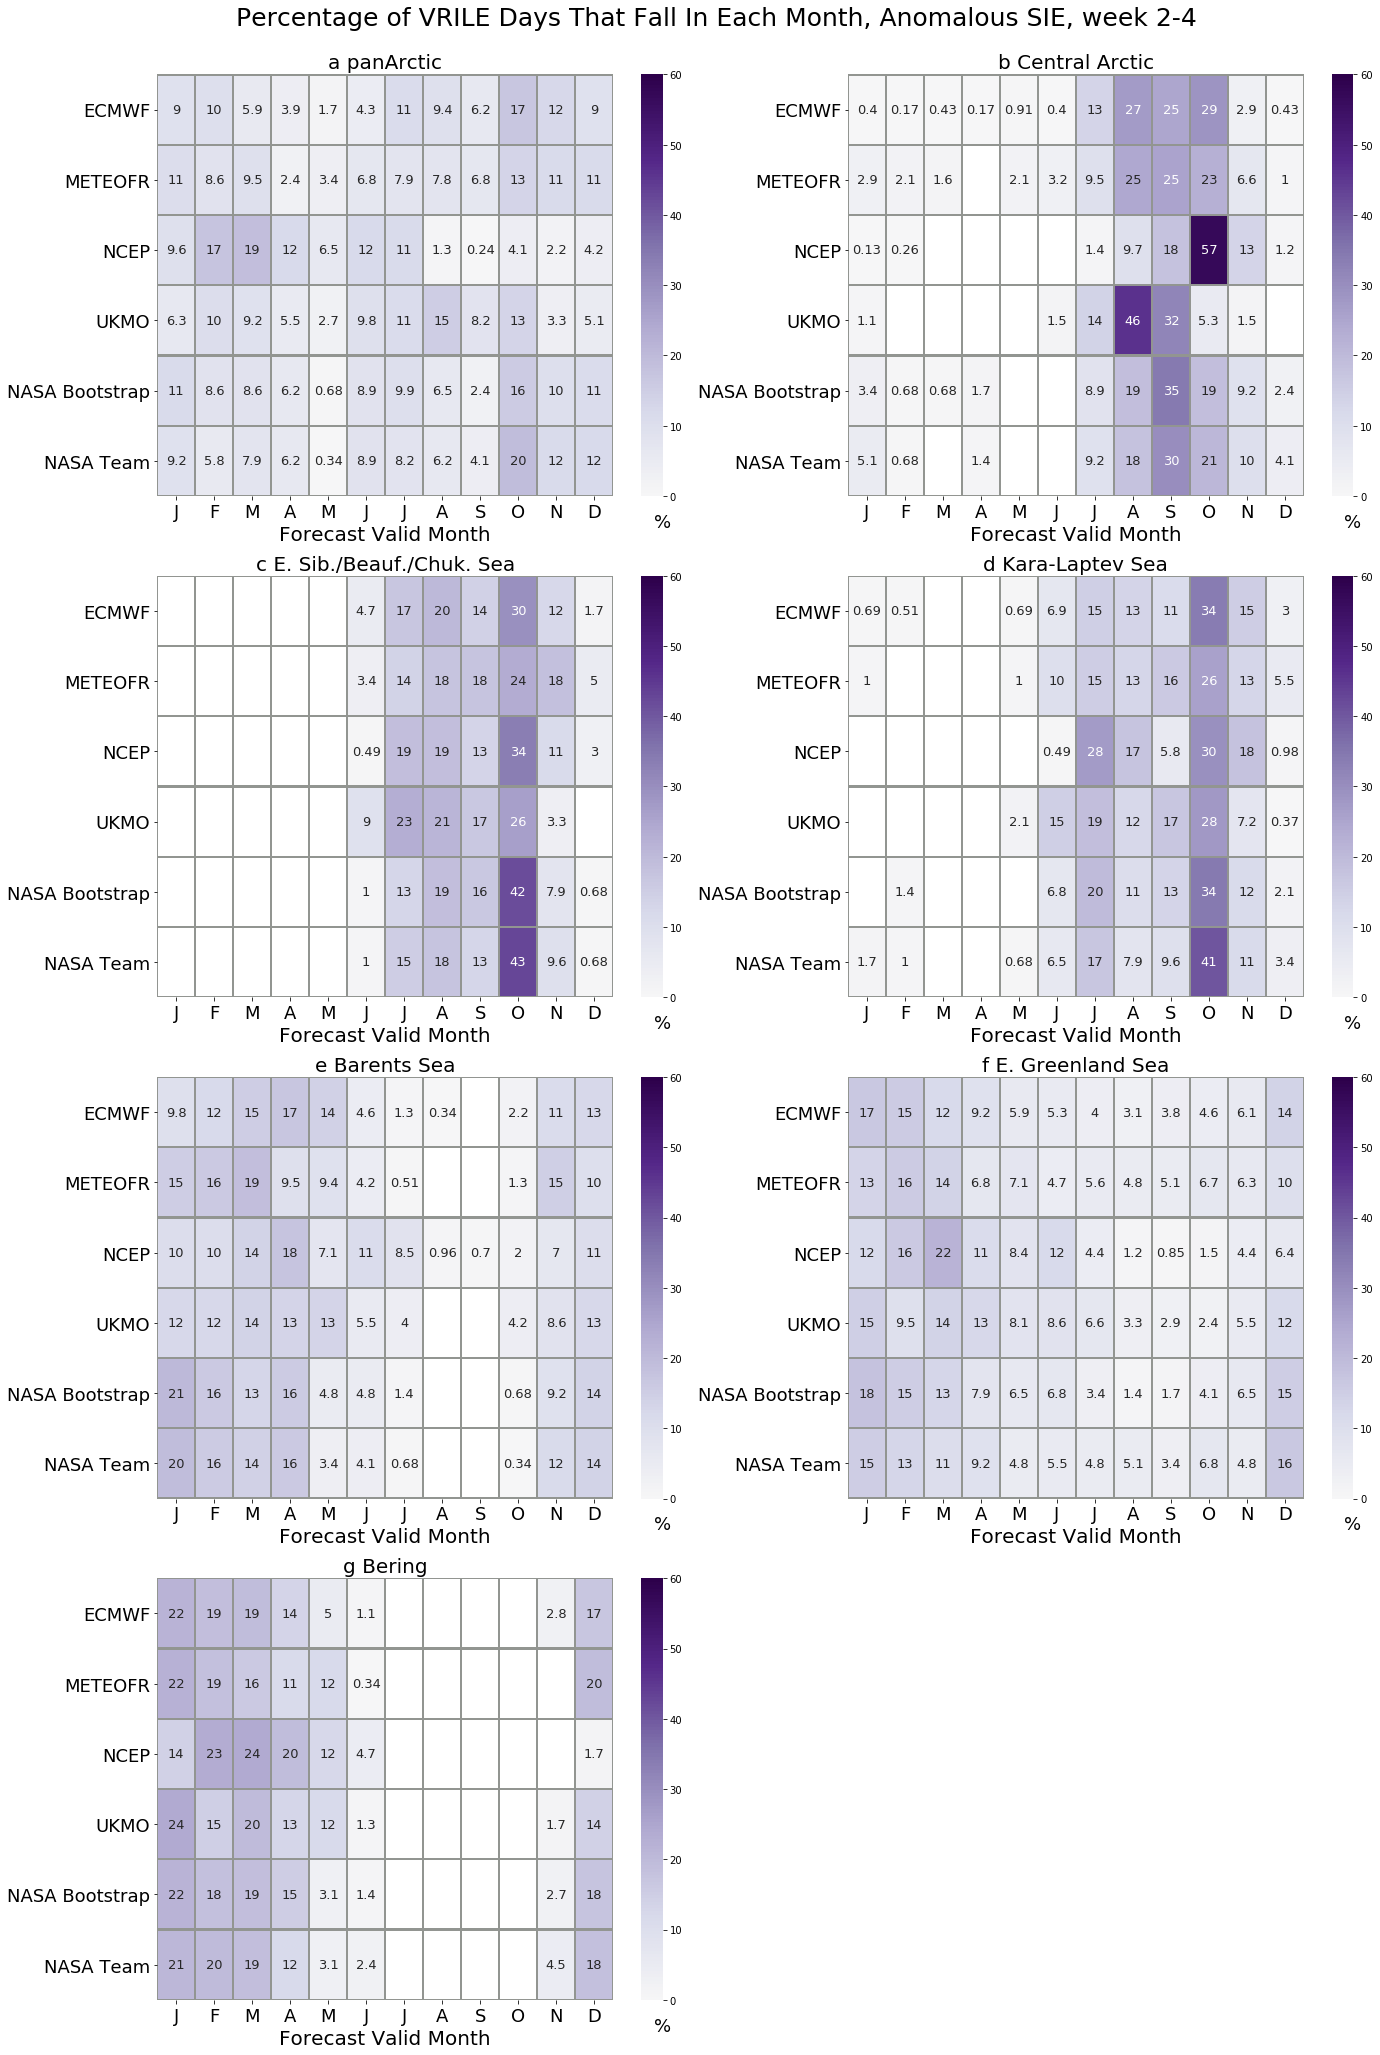

In [7]:
no_rows = 4
no_cols = 2
reg_sel_all = ['panArctic','Central Arctic','E. Sib./Beauf./Chuk. Sea','Kara-Laptev Sea','Barents Sea',
               'E. Greenland Sea','Bering']
fig1,ax1 = plt.subplots(no_rows,no_cols,figsize=(20,28))
vmin = 0
vmax = 60
#
for imod in np.arange(0,len(reg_sel_all)):
    iplt = imod
    reg_sel = reg_sel_all[imod]
    ax_sel = ax1.flat[imod]
    data_plt =  combo.where(combo['region']==reg_sel).dropna(how='all')
    data_plt_mask = data_plt.mask(data_plt==0)
    VRILE_count_plot(ax_sel,data_plt_mask,reg_sel,TO_PLOT,iplt,vmin,vmax)
#fig1.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
fig1.tight_layout()
if (len(lead_week_sel) == 1):
    lead_str = '{lead_min}'.format(lead_min=lead_week_min)
else:
    lead_str = '{lead_min}-{lead_max}'.format(lead_min=lead_week_min,lead_max=lead_week_max)

fig1.suptitle('Percentage of VRILE Days That Fall In Each Month, {title_str}, week {lead_min}'.format(title_str=title_str,
                                                    lead_min=lead_str),fontsize=25,y=1.018)
fig1.delaxes(ax=ax1.flat[7])

In [8]:
fpath_save = '../../figures/'
fname_save = fpath_save+'VRILE_count_{nday_change}day_change_{TO_PLOT_str}_VRILE_thresh{vrile_thresh_str}_seas_{seas_sel}_lead_weeks_{lead_str}.pdf'.format(nday_change=nday_change,
                                                                                    TO_PLOT_str=TO_PLOT_str,
                                                                                   vrile_thresh_str=vrile_thresh_str,
                                                                                    seas_sel=seas_str,
                                                                                    lead_str=lead_str)
fig1.savefig(fname_save,format='pdf',bbox_inches='tight')